In [5]:
from quibble.bond import Bond
from quibble.discount_curve_factory import DiscountCurveFactory
from datetime import date, timedelta

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
cashflows = [
    [
        date(2020, 7, 1),
        date(2021, 1, 1),
        date(2021, 7, 1),
        date(2022, 1, 1)
    ],
    [3, 3, 3, 103]
]

In [8]:
rates_data = [
    [0.5, 1.0, 1.5, 2.0],
    [0.05, 0.055, 0.06, 0.068]
]

In [9]:
from scipy.interpolate import interp1d

In [10]:
interpolant = lambda x, y: interp1d(x, y, fill_value="extrapolate")
dc_factory = DiscountCurveFactory(interpolant)

In [12]:
discount_curve = dc_factory.invoke(rates_data[0], rates_data[1])

In [13]:
bond = Bond(cashflows[0], cashflows[1])

In [18]:
bond.pv(date(2020, 1, 1), discount_curve)

TypeError: sum() got an unexpected keyword argument 'where'

In [31]:
a = timedelta(hours=80)

In [1]:
import numpy

In [2]:
print(numpy.version)

<module 'numpy.version' from '/Users/mike/anaconda3/lib/python3.6/site-packages/numpy/version.py'>


In [21]:
a = numpy.linspace(1,3, 5)

In [24]:
numpy.sum(a, where=a>1.5)

TypeError: sum() got an unexpected keyword argument 'where'

In [40]:
date(2020,1,1) - date(2020,1,2)

datetime.timedelta(-1)

In [69]:
def gen_discount_curve(rates_data):
    rates_interp = interp1d(rates_data[0], rates_data[1], fill_value="extrapolate")
    
    def spot(n_years):
        return numpy.exp(-rates_interp(n_years) * n_years)
    
    return spot
    

In [70]:
discount_curve = gen_discount_curve(rates_data)

In [71]:
discount_curve(0.5)

0.9753099120283326

In [72]:
x = numpy.array(rates_data[0])
rates = numpy.array(rates_data[1])
disc = numpy.exp(-x * rates)

x_cts = numpy.linspace(0, 2.5, 100)
disc_cts = discount_curve(x_cts)

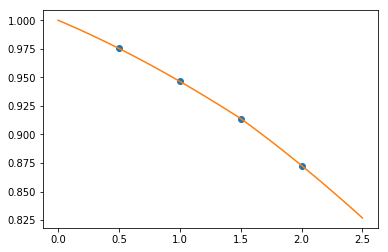

In [73]:
plt.plot(x, disc, 'o', x_cts, disc_cts, '-')

In [75]:
dates = numpy.array(cashflows[0])

In [76]:
dates

array([datetime.date(2020, 7, 1), datetime.date(2021, 1, 1),
       datetime.date(2021, 7, 1), datetime.date(2022, 1, 1)], dtype=object)

In [78]:
tds = dates - date(2020,1,1)

In [79]:
tds.days

AttributeError: 'numpy.ndarray' object has no attribute 'days'